In [ ]:
# import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Real_combine.csv')

In [3]:
df

T    TM    Tm     SLP     H   VV     V    VM      PM 2.5
0      7.4   9.8   4.8  1017.6  93.0  0.5   4.3   9.4  219.720833
1      7.8  12.7   4.4  1018.5  87.0  0.6   4.4  11.1  182.187500
2      6.7  13.4   2.4  1019.4  82.0  0.6   4.8  11.1  154.037500
3      8.6  15.5   3.3  1018.7  72.0  0.8   8.1  20.6  223.208333
4     12.4  20.9   4.4  1017.3  61.0  1.3   8.7  22.2  200.645833
...    ...   ...   ...     ...   ...  ...   ...   ...         ...
1088  18.1  24.0  11.2  1015.4  56.0  1.8  15.9  25.9  288.416667
1089  17.8  25.0  10.7  1015.8  54.0  2.3   9.4  22.2  256.833333
1090  13.9  24.5  11.4  1015.0  95.0  0.6   8.7  14.8  169.000000
1091  16.3  23.0   9.8  1016.9  78.0  1.1   7.4  16.5  186.041667
1092  16.3  23.4   9.0  1017.3  68.0  1.3   7.8  18.3  185.583333

[1093 rows x 9 columns]

In [5]:
df.describe()

T           TM           Tm          SLP            H  \
count  1093.000000  1093.000000  1093.000000  1093.000000  1093.000000   
mean     26.009241    32.482251    19.460201  1008.081885    62.918573   
std       7.237401     6.679078     7.438653     7.529237    15.709816   
min       6.700000     9.800000     0.000000   991.500000    20.000000   
25%      19.300000    27.800000    12.100000  1001.100000    54.000000   
50%      28.200000    34.200000    21.200000  1008.100000    64.000000   
75%      31.700000    37.000000    26.000000  1015.000000    74.000000   
max      38.500000    45.500000    32.700000  1023.200000    98.000000   

                VV            V           VM       PM 2.5  
count  1093.000000  1093.000000  1093.000000  1092.000000  
mean      2.003111     6.751510    15.805124   109.090984  
std       0.747541     3.841137     7.308435    84.465790  
min       0.300000     0.400000     1.900000     0.000000  
25%       1.600000     3.700000    11.100000    41.833333  
50%       1.900000     6.500000    14.800000    83.458333  
75%       2.600000     9.100000    18.300000   158.291667  
max       5.800000    24.400000    57.600000   404.500000

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093 entries, 0 to 1092
Data columns (total 9 columns):
T         1093 non-null float64
TM        1093 non-null float64
Tm        1093 non-null float64
SLP       1093 non-null float64
H         1093 non-null float64
VV        1093 non-null float64
V         1093 non-null float64
VM        1093 non-null float64
PM 2.5    1092 non-null float64
dtypes: float64(9)
memory usage: 77.0 KB


In [8]:
df=df.dropna()

In [9]:
X=df.drop(["PM 2.5"],axis=1)
y=(df["PM 2.5"])

In [10]:
y = y.values.reshape(len(y),1)
print(X.shape, y.shape)

(1092, 8) (1092, 1)


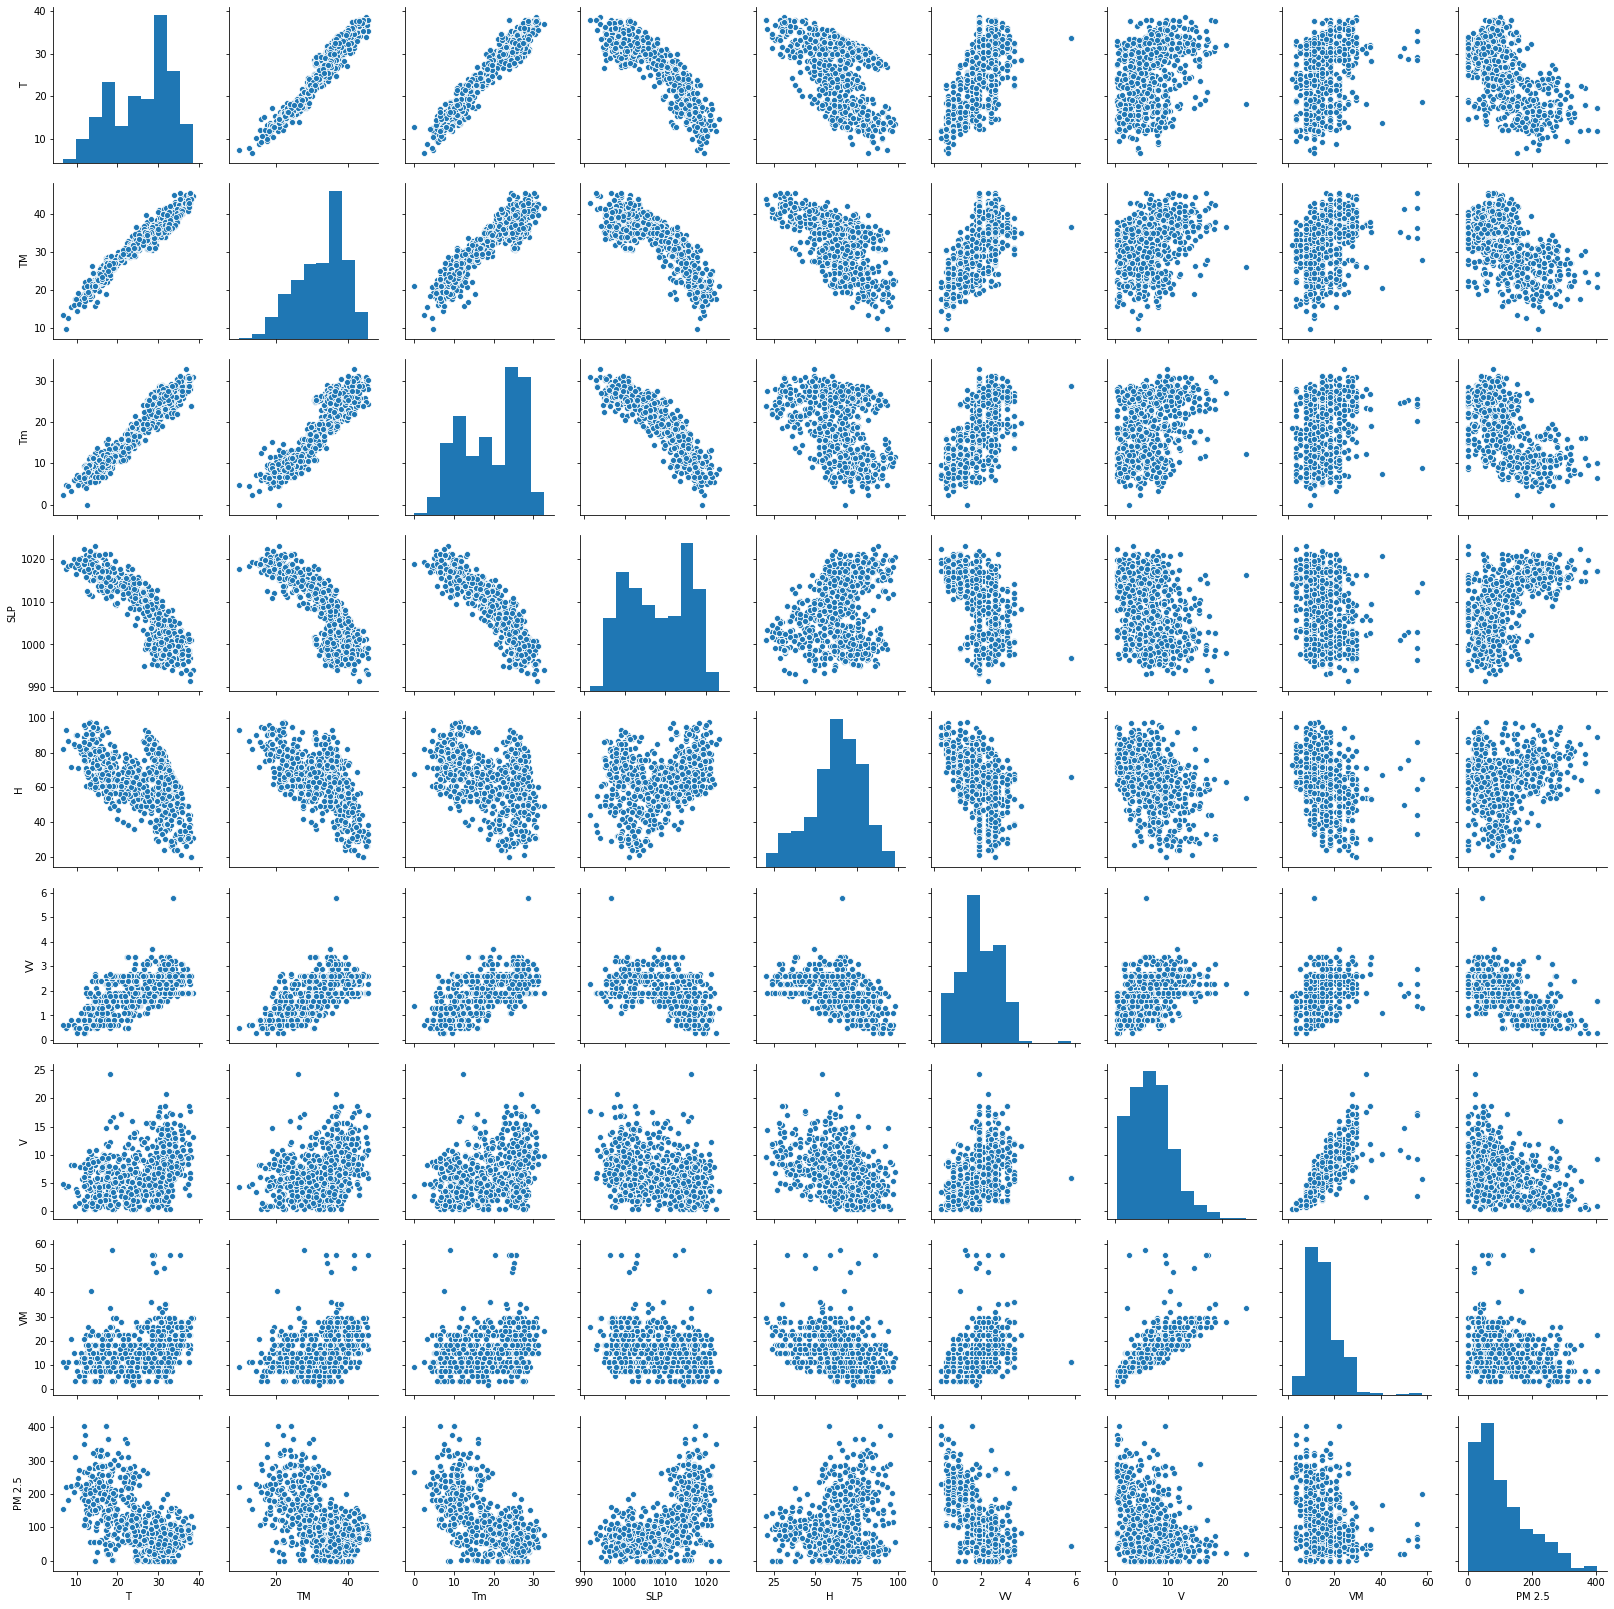

In [11]:
sns.pairplot(df)

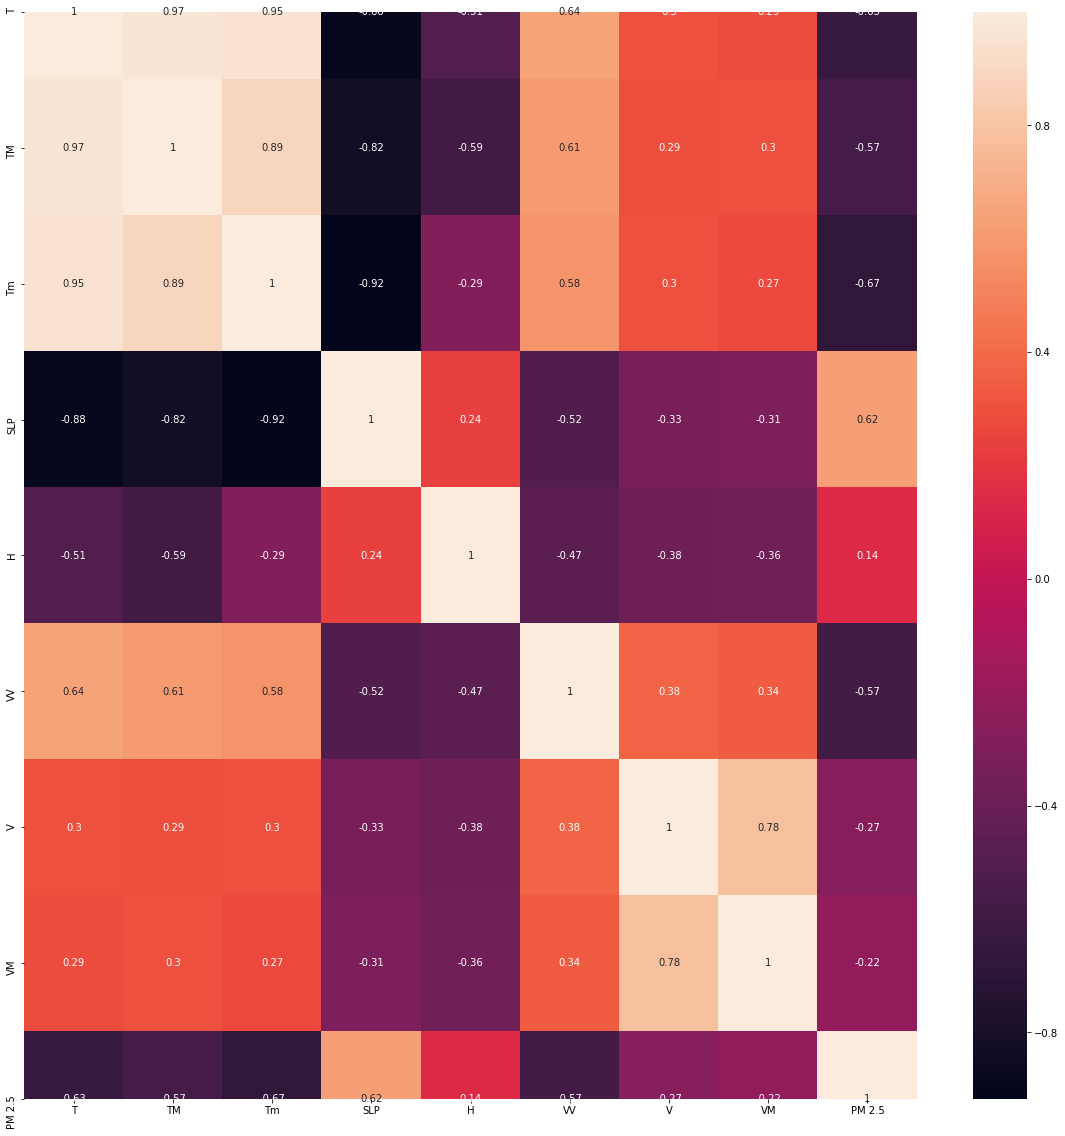

In [12]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True)

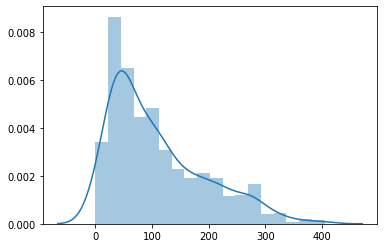

In [13]:
sns.distplot(y)

In [14]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

C:\Users\parva\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\parva\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                    oob_score=False, random_state=None, verbose=0,
                    warm_start=False)

In [15]:
print(model.feature_importances_)

[0.18196033 0.08549268 0.23887526 0.12820323 0.08238846 0.18052539
 0.05955737 0.04299729]


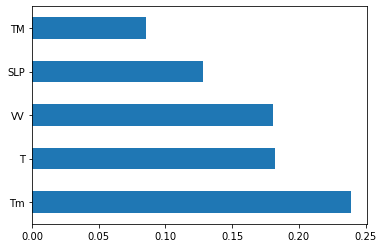

In [16]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

# Model Building

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [18]:
from sklearn.tree import DecisionTreeRegressor

In [20]:
regr = DecisionTreeRegressor()
regr.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [29]:
import pydotplus
import io
from IPython.display import Image
from sklearn.tree import export_graphviz

In [32]:
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

In [33]:
dot_data = io.StringIO()
export_graphviz(regr, feature_names = X.columns, out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.910574 to fit



In [37]:
print("R2 score of training set : {}".format(regr.score(X_train, y_train)))


R2 score of training set : 1.0


In [38]:
print("R2 score of testing set: {}".format(regr.score(X_test, y_test)))

R2 score of testing set: 0.7242911622078861


As the R2 Score of training data is very high as compared to testing data , hence it is a clear case of overfitting
We have go further for hyper parameter tuning

In [40]:
prediction=regr.predict(X_test)

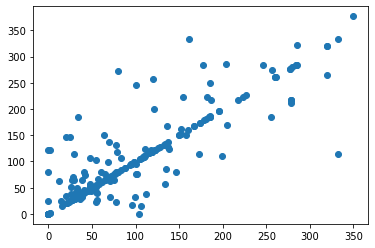

In [44]:
plt.scatter(y_test,prediction)

## Hyperparameter Tuning Decision Tree Regresso

In [48]:
DecisionTreeRegressor()

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [49]:
## Hyper Parameter Optimization

params={
 "splitter"    : ["best","random"] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_samples_leaf" : [ 1,2,3,4,5 ],
"min_weight_fraction_leaf":[0.1,0.2,0.3,0.4],
 "max_features" : ["auto","log2","sqrt",None ],
    "max_leaf_nodes":[None,10,20,30,40,50,60,70]
    
}

In [50]:
# Hyperparameter optimization using GridSearchCV
from sklearn.model_selection import GridSearchCV

In [51]:

random_search=GridSearchCV(regr,param_grid=params,scoring='neg_mean_squared_error',n_jobs=-1,cv=10,verbose=3)

In [52]:
random_search.fit(X,y)

Fitting 10 folds for each of 10240 candidates, totalling 102400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 2298 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 10938 tasks      | elapsed:   11.6s
[Parallel(n_jobs=-1)]: Done 23034 tasks      | elapsed:   19.3s
[Parallel(n_jobs=-1)]: Done 38586 tasks      | elapsed:   30.5s
[Parallel(n_jobs=-1)]: Done 57594 tasks      | elapsed:   44.6s
[Parallel(n_jobs=-1)]: Done 80058 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 102400 out of 102400 | elapsed:  1.3min finished
C:\Users\parva\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=None,
                                             splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 8, 10, 12, 15],
                         'max_features': ['auto', 'log2', 'sqrt', None],
                         'max_leaf_nodes': [None, 10, 20, 30, 40, 50, 60,

In [53]:
random_search.best_params_

{'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': 50,
 'min_samples_leaf': 4,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}

In [54]:
regr = DecisionTreeRegressor(**{'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': 50,
 'min_samples_leaf': 4,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'})

In [57]:
random_search.best_score_

-3132.09677598143

In [61]:
predictions=random_search.predict(X_test)

In [63]:
from sklearn import metrics

In [64]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 38.99445118764953
MSE: 2880.5248802215447
RMSE: 53.670521519932564
